In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# URL for COVID-19 confirmed cases dataset from Johns Hopkins University GitHub repository
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# Load the dataset into a pandas DataFrame
covid_data = pd.read_csv(url)

# Display the first few rows of the dataset
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


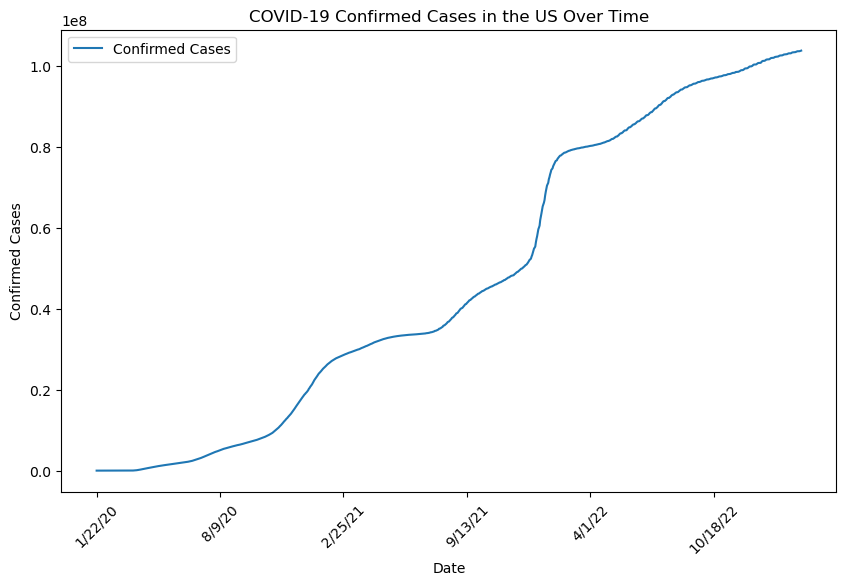

In [6]:
# Check the structure and data types
covid_data.info()

# Summary statistics
covid_data.describe()

# Check for missing values
covid_data.isnull().sum()

# Visualizing the trend of COVID-19 cases over time for a selected country (e.g., US)
us_data = covid_data[covid_data['Country/Region'] == 'US'].iloc[:, 4:].transpose()
us_data.columns = ['Confirmed Cases']
us_data.plot(figsize=(10, 6))
plt.title('COVID-19 Confirmed Cases in the US Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Fill missing values with 0 for this dataset (it may be appropriate depending on the dataset's context)
covid_data = covid_data.fillna(0)

In [17]:
# Label encoding for the 'Country/Region' column
covid_data = pd.get_dummies(covid_data, columns=['Country/Region'])

In [ ]:
# Feature scaling for numerical columns (except 'Country/Region')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the dataframe to avoid altering the original
covid_data_scaled = covid_data.copy()

# Apply scaling to the appropriate columns and convert the result to float64
scaler = StandardScaler()
covid_data_scaled.iloc[:, 4:] = scaler.fit_transform(covid_data.iloc[:, 4:]).astype('float64')